# Installation and Import of packages, mount the drive

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#!pip install scipy
import pandas as pd
from pandas.plotting import table
import math
from scipy.stats import binom
import numpy as np
from sympy import *
from sympy.stats import *
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
#import dataframe_image as dfi

# Combination

$$\binom{n}{r} = \frac{n!}{r!(n-r)!}$$

Suppose we have a list [1,2,4], 3 photons with length of time bins 7.
The ways we can organize them is $3!$, and a selection of these 3 photons from a collection of this 7 time bins in which the order of selection does not matter is $\binom{n}{r}$. \\

https://www.math.net/combination



In [3]:
def combination(n,r):
  return math.factorial(n) / (math.factorial(n-r)*math.factorial(r))

combination(7,3)

35.0

## Binomial Distribution of Loss Error
There are n photons in a time bin. The total probability of lossing $l$ photons and not losing $n-l$ photons

$$P(n, l, P_l) = \binom{n}{l} P_l^l(1-P_l)^{n-l} $$

$n$ is the number of photon. \\
$l$ is the number of loss photon. \\
$P_l$ is the probability of loss error. \\

In [4]:
def LossDistribute(n,l,P_l):
  return (math.factorial(n) / (math.factorial(n-l)*math.factorial(l)))*(P_l)**l*(1-P_l)**(n-l)

In [5]:
LossDistribute(3,1,0.3)

0.4409999999999999

#Binomial Distribution of Error Probability

$$\text{ Binomail Distribution of Error} = \text{Binomial Distribution of Loss Error} \times \text{Binomial Distribution of Added Error} $$

\\

$$P(l, a, n, N, P_l, P_a) = \binom{n}{l} P_l^l(1-P_l)^{n-l} \times \binom{N-n}{a} P_a^a (1-P_a)^{N-n-a}$$

$n$ = number of photon \\
$l$ = number of photon lost \\
$a$ = number of photon added \\
$N$ = length of time bin \\
$P_l$ = probability of lost error \\
$P_a$ = probability of added error \\

In [6]:
def LossDistribute(n,l,P_l):
  return (math.factorial(n) / (math.factorial(n-l)*math.factorial(l)))*(P_l)**l*(1-P_l)**(n-l)

In [7]:
LossDistribute(3,1,0.2)

0.3840000000000001

In [8]:
def AddDistribute(N, n, a, P_a):
  return (math.factorial(N-n) / (math.factorial(N-n-a)*math.factorial(a)))*(P_a)**a*(1-P_a)**(N-n-a)

In [9]:
AddDistribute(7,3,1,0.2)

0.40960000000000013

In [10]:
def Perr(N,n,l,a, P_l, P_a):
  return (math.factorial(n) / (math.factorial(n-l) * math.factorial(l))) * (P_l)**l*(1-P_l)**(n-l) * (math.factorial(N-n) / (math.factorial(N-n-a) * math.factorial(a))) * (P_a)**a*(1-P_a)**(N-n-a) 

In [11]:
Perr(7,3,1,1, 0.2, 0.2)

0.1572864000000001

# SymPy

In [12]:
import sympy as sy

In [13]:
# Perr(N,n,l,a, P_l, P_a)
N,n,l,a,P, P = sy.symbols('N,n,l,a,P, P')

In [14]:
# make a general expression for Binomial Distribution of Loss Error
# (math.factorial(n) / (math.factorial(n-l)*math.factorial(l)))*(P_l)**l*(1-P_l)**(n-l)
# n,l,P_l
n, l, P = sy.symbols('n,l,P')
#binomial(N,K)
loss = binomial(n,l)*(P)**l*(1-P)**(n-l)

In [15]:
# make a general expression for Binomial Distribution of Add Error
# (math.factorial(N-n) / (math.factorial(N-n-a)*math.factorial(a)))*(P_a)**a*(1-P_a)**(N-n-a)
# N, n, a, P_a
N, n, a, P = sy.symbols('N, n, a, P')
add = binomial(N-n,a)*(P)**a*(1-P)**(N-n-a)

In [16]:
# substitute to get z_4 in parallel with z_{n-1} = z_n 
Loss = loss.subs([(n,n),(l,l), (P,P)])
Add = add.subs([(N,N),(n,n), (a,a), (P,P)])

In [17]:
Loss

P**l*(1 - P)**(-l + n)*binomial(n, l)

In [18]:
Add

P**a*(1 - P)**(N - a - n)*binomial(N - n, a)

In [19]:
Perr = Loss*Add
Perr

P**a*P**l*(1 - P)**(-l + n)*(1 - P)**(N - a - n)*binomial(n, l)*binomial(N - n, a)

In [20]:
Perr_1 = Perr.subs([(N,7),(n,3), (l, 0), (a, 0), (P, P), (P,P)])
Perr_2 = Perr.subs([(N,7),(n,3), (l, 1), (a, 0), (P, P), (P,P)])
Perr_3 = Perr.subs([(N,7),(n,3), (l, 0), (a, 1), (P, P), (P,P)])
#Perr_plot0 = Perr_plot.args[0].args[1]
#Perr_plot1 = Perr_plot.args[0].args[2]
#p = plot(Perr_plot, show = False)

In [21]:
P_Success = Perr_1 + Perr_2 + Perr_3
P_Success

7*P*(1 - P)**6 + (1 - P)**7

In [22]:
P_Detect = 1 - P_Success
P_Detect

-7*P*(1 - P)**6 - (1 - P)**7 + 1

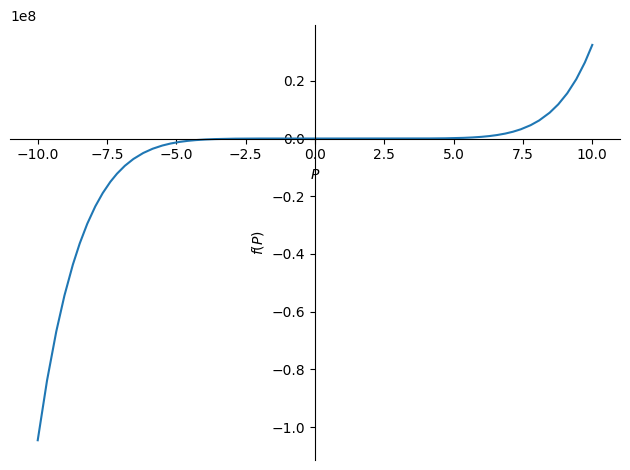

In [23]:
p1 = plot(P_Success, show = False)
#p2 = plot(P, show = False)
#p1.append(p2[0])
p1.show()

In [24]:
#loss = (P, binomial(3,1)*(P)**1*(1-P)**(3-1))
#add = (P, binomial(7-3,1)*(P)**1*(1-P)**(7-3-1))

#p = plot_parametric(loss, add, (p,0,1), line_color = 'blue')

In [25]:
z_plot = Zrl.subs( [(L,1.),(C,1.)])
z_plot0 = z_plot.args[0].args[0]
z_plot1 = z_plot.args[0].args[1]

NameError: name 'Zrl' is not defined

In [ ]:
p0 = sy.plot(sy.(z_plot0),(w,0,4.), show=False, line_color='C0', label='Re Z', legend=True,
            xlabel='$\omega L$', ylabel='$Z / Z_c$', title='first solution[0]')

# Draft

In [ ]:
# substitute to get z_4 in parallel with z_{n-1} = z_n 
Zp_4n = parallel.subs([(a,Z4),(b,Zn)])
Zs_34n = series.subs([(c,Z3),(d,Zp_4n)])

Zp_234n = parallel.subs([(a,Z2),(b,Zs_34n)])
Zs_1234n = series.subs([(c,Z1),(d,Zp_234n)])


L, C, w = sy.symbols('L, C, w')
Zrl = Zn.subs( [ (Z1,sy.I*w*L), (Z2,1/(sy.I*w*C)),(Z3,sy.I*2*w*L), (Z4,1/(sy.I*2*w*C))  ] )
Zrl

z_plot = Zrl.subs( [(L,1.),(C,1.)])
z_plot0 = z_plot.args[0].args[0]
z_plot1 = z_plot.args[0].args[1]

p0 = sy.plot(sy.re(z_plot0),(w,0,4.), show=False, line_color='C0', label='Re Z', legend=True,
            xlabel='$\omega L$', ylabel='$Z / Z_c$', title='first solution[0]')
p0im = sy.plot(sy.im(z_plot0),(w,0,4.), show=False, line_color='C1', label='Im Z', legend=True)

p1 = sy.plot(sy.re(z_plot1),(w,0,4.), show=False, line_color='C0', label='Re Z', legend=True,
            xlabel='$\omega L$', ylabel='$Z / Z_c$', title='second solution[1]')
p1im = sy.plot(sy.im(z_plot1),(w,0,4.), show=False, line_color='C1', label='Im Z', legend=True)

p0.extend(p0im)
p1.extend(p1im)

p0.show()
p1.show()

In [ ]:
n = 3
k = 1
p = 0.3
binom.pmf(k, n, p)

0.4409999999999998

In [ ]:
# for N in range (1, 7):
#   for n in range(1,4):
#     (n,N)
# print(n,N)

In [ ]:
# for N in range (1, 7):
#   for n in range(1,3):
#     for l in range(1,3):
#       X = Perr(N,n,l,a, P_l, P_a)
# binDist = density(X).dict

In [ ]:
from sympy.abc import x, y
from sympy import solve

In [ ]:
solve(x**2 - y, x, dict=True)

[{x: -sqrt(y)}, {x: sqrt(y)}]

In [ ]:
from sympy import * 
  
N = 7
K = 3 
print("N = {}, K = {}".format(N, K))
   
# Use sympy.binomial() method 
comb = binomial(N, K)  
      
print("N choose K : {}".format(comb)) 

N = 7, K = 3
N choose K : 35


In [ ]:
from sympy import * 
  
N, K = symbols('A B')
  
print("N = {}, K = {}".format(N, K))
   
# Use sympy.binomial() method 
comb = binomial(N, K)  
      
print("N choose K : {}".format(comb))

N = A, K = B
N choose K : binomial(A, B)


In [ ]:
# Import sympy, Binomial, density
from sympy.stats import Binomial, density

# Using sympy.stats.Binomial() method
X = Binomial('X', 4, 1 / 3)
binDist = density(X).dict

print(binDist)


{0: 0.197530864197531, 1: 0.395061728395062, 2: 0.296296296296296, 3: 0.0987654320987654, 4: 0.0123456790123457}


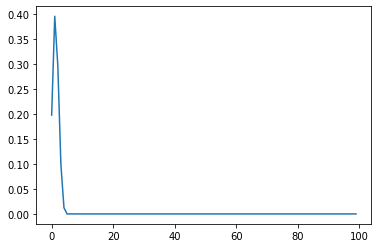

In [ ]:
d = density(X)
u = np.arange(0,100)
v = [d(i) for i in u]

pyplot.plot(u,v)

In [ ]:
# Using sympy.stats.Binomial() method
Error = Binomial('X', 4, 1 / 3)
binDist = density(X).dict

print(binDist)

{0: 0.197530864197531, 1: 0.395061728395062, 2: 0.296296296296296, 3: 0.0987654320987654, 4: 0.0123456790123457}


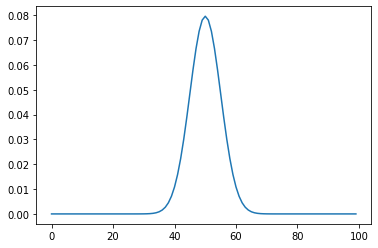

In [ ]:


X = Binomial('X', 100 ,  S.Half, 1, 0)

d = density(X)
u = np.arange(0,100)
v1 = [d(i) for i in u]

pyplot.plot(u,v1)

In [ ]:
n = [1, 2, 4, 7, 12, 20, 29, 38, 52, 73, 94, 127, 151, 181, 211] 
T = [1, 3, 7, 14, 26, 46, 75, 113, 165, 238, 332, 459, 610, 791, 1002]

#number of loss
l = np.arange(0,4)
#number of photon
for n in range(2,7):
  #number of time bin
  #TimeBin = T[n-1]
  v1 = [LossDistribute(TimeBin, i, 0.3) for i in l]

pyplot.plot(l,v1)


NameError: ignored

In [ ]:
# Using sympy.stats.Binomial() method
Error = Binomial('X', 4, 1 / 3)
binDist = density(X).dict

print(binDist)

{0: 1/1267650600228229401496703205376, 1: 25/316912650057057350374175801344, 2: 2475/633825300114114700748351602688, 3: 40425/316912650057057350374175801344, 4: 3921225/1267650600228229401496703205376, 5: 2352735/39614081257132168796771975168, 6: 74503275/79228162514264337593543950336, 7: 500236275/39614081257132168796771975168, 8: 46521973575/316912650057057350374175801344, 9: 118889488025/79228162514264337593543950336, 10: 2163788682055/158456325028528675187087900672, 11: 8851862790225/79228162514264337593543950336, 12: 262605262776675/316912650057057350374175801344, 13: 222204453118725/39614081257132168796771975168, 14: 2761683917332725/79228162514264337593543950336, 15: 7916827229687145/39614081257132168796771975168, 16: 672930314523407325/633825300114114700748351602688, 17: 831266859117150225/158456325028528675187087900672, 18: 7666127700747052075/316912650057057350374175801344, 19: 16542696617401533425/158456325028528675187087900672, 20: 267991685201904841485/63382530011411470074

In [ ]:
l = [1,2,3]
p_l = []
for l in range (0,5):
  for P_l in range (0,2):
    print(LossDistribute(7,n,P_l))



    

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
from scipy.stats import binom
# setting the values
# of n and p
n = 6
p = 0.6
# defining the list of r values
r_values = list(range(n + 1))
# obtaining the mean and variance
mean, var = binom.stats(n, p)
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# printing the table
print("r\tp(r)")
for i in range(n + 1):
	print(str(r_values[i]) + "\t" + str(dist[i]))
# printing mean and variance
print("mean = "+str(mean))
print("variance = "+str(var))


r	p(r)
0	0.0040960000000000015
1	0.03686400000000002
2	0.1382400000000001
3	0.2764800000000001
4	0.3110400000000001
5	0.1866240000000001
6	0.04665599999999999
mean = 3.5999999999999996
variance = 1.44


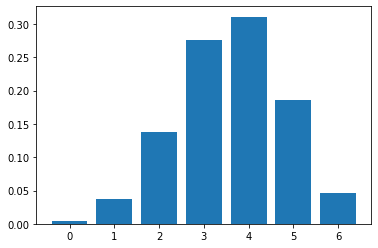

In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt
# setting the values
# of n and p
n = 6
p = 0.6
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph
plt.bar(r_values, dist)
plt.show()
